In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import time

In [3]:
dataset = pd.read_csv('dataset.csv')
dataset.head(10)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capgain,caploss,hrs,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
dataset = dataset[dataset.workclass != '?']
dataset = dataset[dataset.occupation != '?']
dataset = dataset[dataset.country != '?']
dataset['income'] = dataset['income'].map(lambda x: x.rstrip('.'))

In [5]:
# Transform the "income" column
dataset['income'] = dataset['income'].apply(lambda x: 0 if x == '<=50K' else 1)
dataset.rename(columns = {'income':'incomebiggerthat50K'}, inplace = True)
dataset

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capgain,caploss,hrs,country,incomebiggerthat50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [6]:
#Encode columns to int values using LabelEncoder
dataset.workclass = LabelEncoder().fit_transform(dataset.workclass)
dataset.maritalstatus = LabelEncoder().fit_transform(dataset.maritalstatus)
dataset.occupation = LabelEncoder().fit_transform(dataset.occupation)
dataset.relationship = LabelEncoder().fit_transform(dataset.relationship)
dataset.race = LabelEncoder().fit_transform(dataset.race)
dataset.sex = LabelEncoder().fit_transform(dataset.sex)
dataset.country = LabelEncoder().fit_transform(dataset.country)
dataset.incomebiggerthat50K = LabelEncoder().fit_transform(dataset.incomebiggerthat50K)
dataset

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capgain,caploss,hrs,country,incomebiggerthat50K
0,39,5,77516,Bachelors,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,Bachelors,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,HS-grad,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,11th,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,Bachelors,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,2,245211,Bachelors,13,4,9,3,4,1,0,0,40,38,0
48837,39,2,215419,Bachelors,13,0,9,1,4,0,0,0,36,38,0
48839,38,2,374983,Bachelors,13,2,9,0,4,1,0,0,50,38,0
48840,44,2,83891,Bachelors,13,0,0,3,1,1,5455,0,40,38,0


In [7]:
#drop column that are not needed - education column as it is same meaning as educationnum
dataset.drop(dataset.columns[3],axis=1,inplace=True)
dataset

,age,workclass,fnlwgt,educationnum,maritalstatus,occupation,relationship,race,sex,capgain,caploss,hrs,country,incomebiggerthat50K
0,39,5,77516,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,2,245211,13,4,9,3,4,1,0,0,40,38,0
48837,39,2,215419,13,0,9,1,4,0,0,0,36,38,0
48839,38,2,374983,13,2,9,0,4,1,0,0,50,38,0
48840,44,2,83891,13,0,0,3,1,1,5455,0,40,38,0


In [8]:
X = dataset.drop('incomebiggerthat50K', axis=1)
Y = dataset['incomebiggerthat50K']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
#choose best parameter for logistic Regression
logisticRegression_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Instantiate the grid search with reduced parameters
logisticRegression_grid_search = GridSearchCV(LogisticRegression(max_iter=5000, random_state=42), 
                                   param_grid, 
                                   cv=3, 
                                   scoring='accuracy', 
                                   verbose=1, 
                                   n_jobs=-1)

# Fit the grid search to the data
logisticRegression_grid_search.fit(X_train, y_train)

# Get the best parameters
best_logisticRegression_params = logisticRegression_grid_search.best_params_

best_logisticRegression_params

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [15]:
#choose best parameter for logistic Regression
decisionTree_param_grid = {
    'max_depth': [6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [20, 30, 40],
    'ccp_alpha': [0.001, 0.002, 0.003]
}

# Instantiate the grid search
decisionTree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), 
                              decisionTree_param_grid, 
                              cv=3, 
                              scoring='accuracy', 
                              verbose=1, 
                              n_jobs=-1)

# Instantiate and fit the grid search for Decision Trees
decisionTree_grid_search.fit(X_train, y_train)

# Get the best parameters
best_decisionTree_params = decisionTree_grid_search.best_params_

best_decisionTree_params

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 20}

In [23]:
#define the classifiers and its parameters
classifiers = {
    "Logistic Regression": LogisticRegression(C=10, penalty='l1', solver='liblinear',max_iter=5000, random_state=42),
    "Decision Trees": DecisionTreeClassifier(max_depth = 6, random_state = 0, criterion="gini", min_samples_leaf=20, ccp_alpha=0.001)
}

In [24]:
test_scores = {}
train_time = {}
for name, clf in classifiers.items():
    # Train the classifier
    startTime = time.time()
    clf.fit(X_train, y_train)
    stopTime = time.time()
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the result
    test_scores[name] = accuracy
    train_time[name]= (stopTime - startTime)

In [25]:
test_scores

{'Logistic Regression': 0.8221116639027087,
 'Decision Trees': 0.8495301271420674}

In [26]:
train_time

{'Logistic Regression': 0.2330000400543213,
 'Decision Trees': 0.08800005912780762}

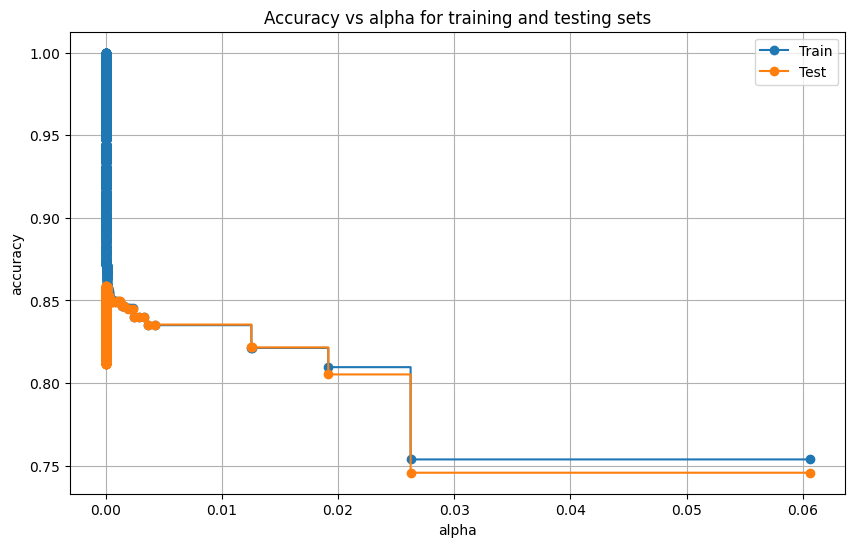

In [28]:
# Extra for calculate the complexity of Decision Tree

# Determine the values of alpha that would prune the default tree
path = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train a decision tree for each value of alpha and store its performance on the test set
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
dataset.to_csv('datasetout.csv')